# **`pycoco`** and **`CoCo`** 'recon' files

___

## Introduction

**`CoCo`** generates as an output, a series of files in `$COCO_ROOT_DIR/recon/`. In this notebook, we will interact with the reconstructed light curve file, the `$SNNAME.dat` and the `$SNNAME.stat` file.

In [1]:
# import sys
# import numpy as np
# import matplotlib.pyplot as plt

# def col(i):
#     colour = {0 : "#59D11D", 1 : "#A61C00", 2 : "#F2990A", \
#               3 : "#000000", 4 : "#f1c40f", 5 : "#e67e22", \
#               6 : "#e74c3c", 7 : "#1abc9c"}
#     return colour[i % 8]

# reconfile = '/Users/berto/Code/CoCo/recon/SN2005bf.dat'
# lcfile = '/Users/berto/Code/verbose-enigma/testdata/lc/SN2005bf.dat'

# RECON = np.loadtxt(reconfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
# LC = np.loadtxt(lcfile, unpack=True, dtype=[('MJD', 'float'), ('Flux', 'float'), ('Error', 'float'), ('Filter', 'S10')])
# FLT = np.unique(LC[3])

# for i in range(FLT.size):
#     idx = np.where(LC[3] == FLT[i])
#     plt.errorbar(LC[0][idx], LC[1][idx], yerr=LC[2][idx], markersize=10, fmt='o', color=col(i), label=FLT[i].decode())

#     idx = np.where(RECON[3] == FLT[i])
#     plt.fill_between(RECON[0][idx], RECON[1][idx] + RECON[2][idx], RECON[1][idx] - RECON[2][idx], color=col(i), alpha=0.5)


# plt.xlim(RECON[0].min() - 10, RECON[0].max() + 10)
# plt.legend()
# plt.show()

In [2]:
from __future__ import print_function ## Force python3-like printing

%matplotlib inline
from matplotlib import pyplot as plt

import os
import numpy as np
from astropy.table import Table

import pycoco as pcc

reload(pcc) ## FOR DEV

<module 'pycoco' from '/Users/berto/Code/verbose-enigma/pycoco/__init__.pyc'>

In [3]:
L = pcc.LCfitClass()

In [4]:
L.recon_directory

'/Users/berto/Code/CoCo/recon'

In [5]:
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2005bf.dat'))
# recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh.dat'))
recon_filename = os.path.abspath(os.path.join(L.recon_directory, 'SN2011dh_Bessell.dat'))


print(recon_filename)
L.load_formatted_phot(recon_filename)
L.unpack()

/Users/berto/Code/CoCo/recon/SN2011dh_Bessell.dat


In [6]:
L.data

OrderedDict([('BessellB', <Table length=132>
                MJD            flux          ...       flux_upper             flux_lower      
                 d    erg / (Angstrom cm2 s) ... erg / (Angstrom cm2 s) erg / (Angstrom cm2 s)
              float64        float64         ...        float64                float64        
              ------- ---------------------- ... ---------------------- ----------------------
              55701.0            4.68428e-18 ...            5.68893e-18            3.67963e-18
              55702.0            7.70185e-18 ...            9.23922e-18            6.16448e-18
              55703.0            1.26445e-17 ...           1.498023e-17           1.030877e-17
              55704.0            2.07196e-17 ...            2.42376e-17            1.72016e-17
              55705.0            3.38671e-17 ...           3.910987e-17           2.862433e-17
              55706.0            5.51776e-17 ...            6.28891e-17            4.74661e-17
     

In [7]:
L.data_filters

OrderedDict([('BessellB', <pycoco.FilterClass instance at 0x10f59b758>),
             ('BessellI', <pycoco.FilterClass instance at 0x10f4b5488>),
             ('BessellR', <pycoco.FilterClass instance at 0x10f4beab8>),
             ('BessellV', <pycoco.FilterClass instance at 0x10f56a5f0>)])

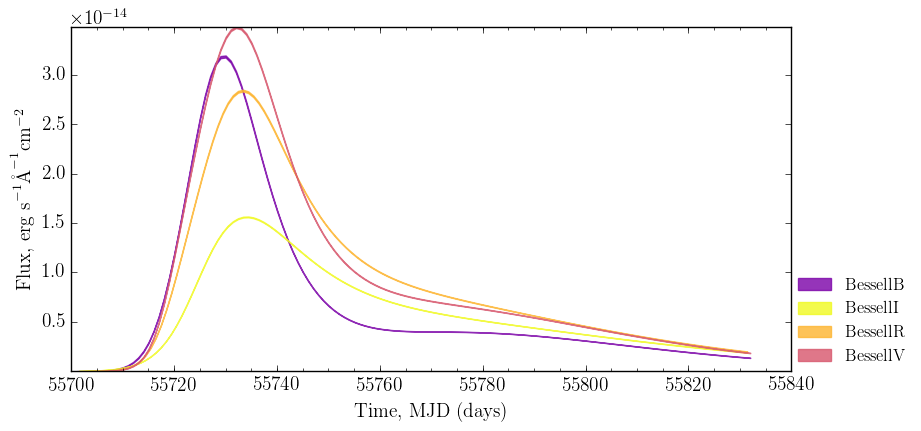

In [8]:
L.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x10f7cd090>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


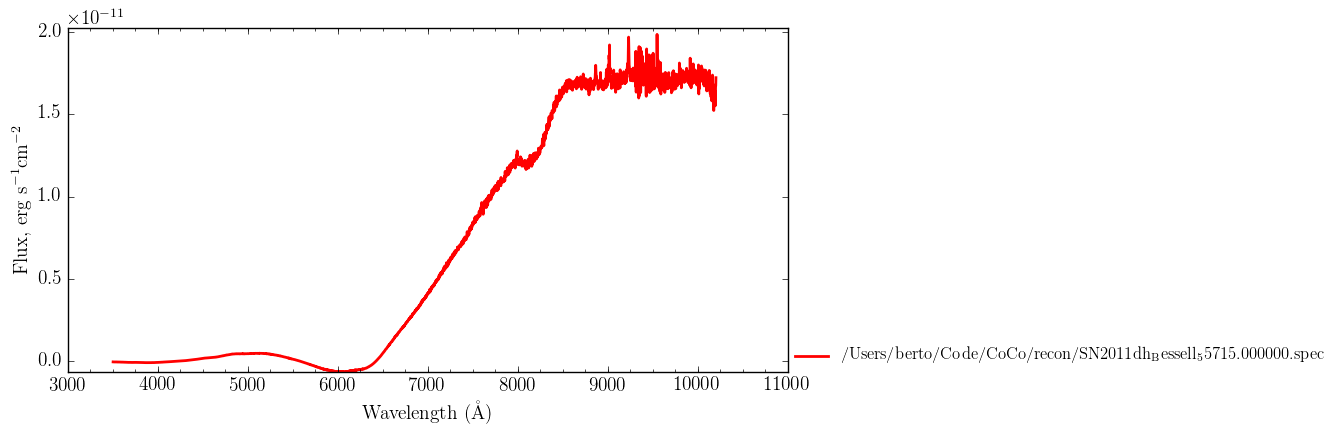

In [9]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_Bessell_55715.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x10f7bfc10>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


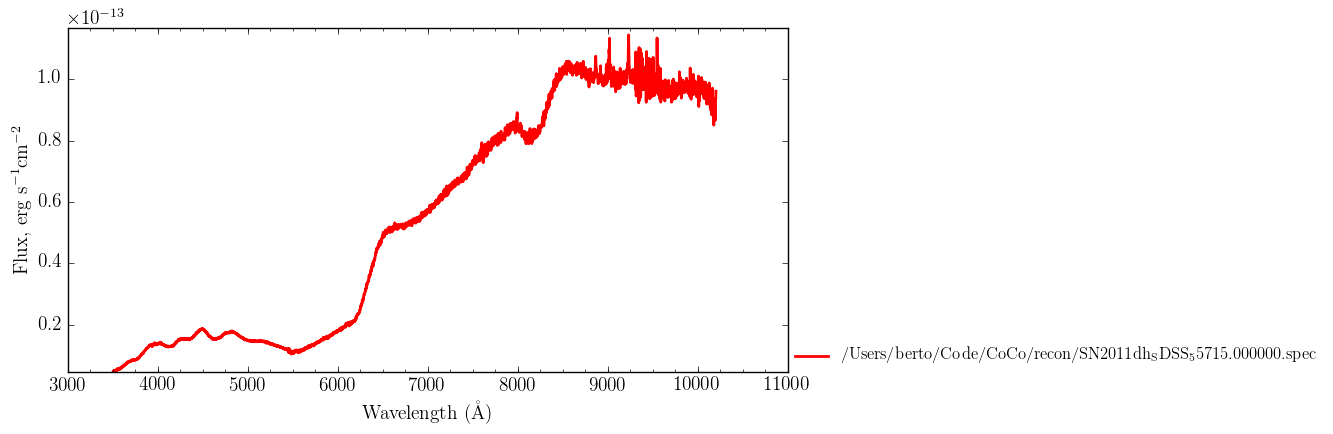

In [10]:
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()

You didn't supply a directory, so using self.recon_directory
Reading /Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x110a89f90>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux','flux_err')>, 'primary_key': None}


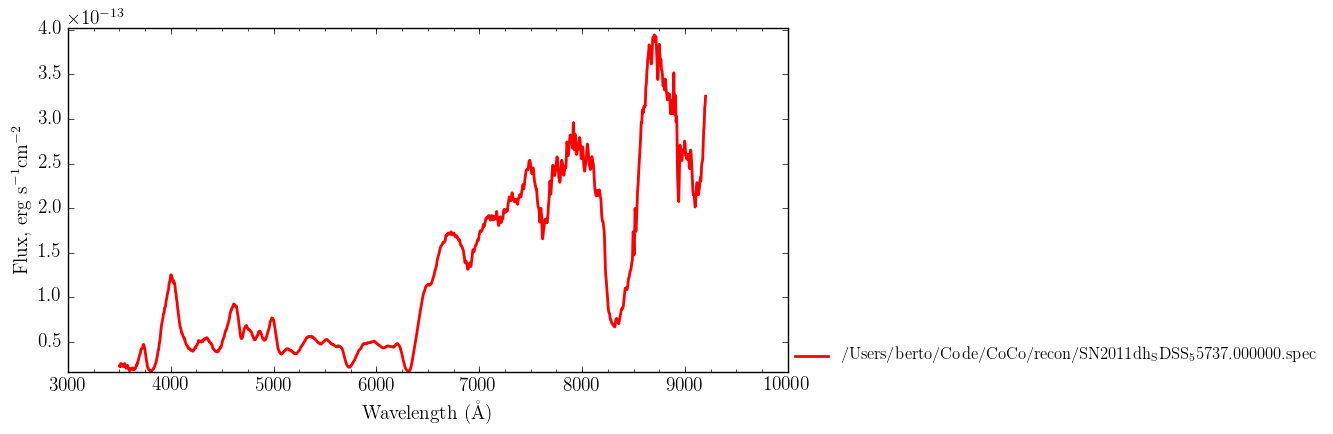

In [11]:
# recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55715.000000.spec'
recon_spec_path = '/Users/berto/Code/CoCo/recon/SN2011dh_SDSS_55737.000000.spec'
mS = pcc.specfitClass()
mS.load(filename = recon_spec_path)
mS.plot()
# spec_table = Table.read(recon_spec_path, format = fmt, names = names)
# spec_table.

You didn't supply a directory, so using self.data_directory
Reading /Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat
{'_meta': OrderedDict([('filename', '/Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat')]), '_masked': False, '_copy_indices': True, '_column_class': <class 'astropy.table.column.Column'>, 'formatter': <astropy.table.pprint.TableFormatter object at 0x10660c5d0>, '_init_indices': True, 'columns': <TableColumns names=('wavelength','flux')>, 'primary_key': None}


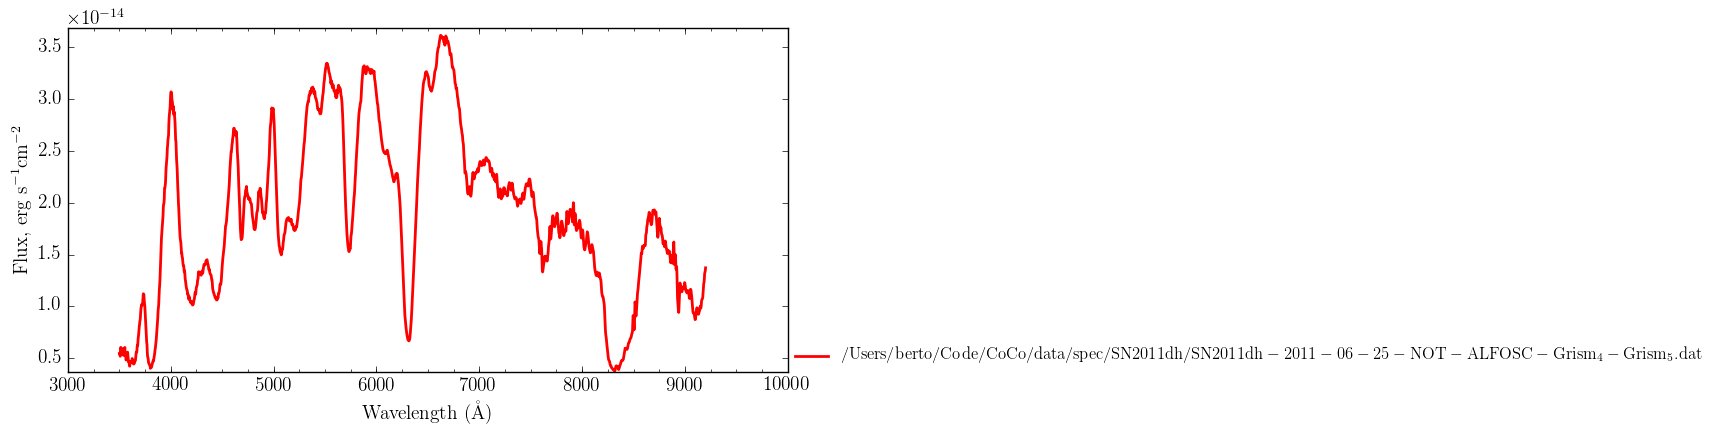

In [12]:
obs_spec_path = '/Users/berto/Code/CoCo/data/spec/SN2011dh/SN2011dh-2011-06-25-NOT-ALFOSC-Grism_4-Grism_5.dat'
S = pcc.SpectrumClass()
S.load(filename = obs_spec_path)
S.plot()

1.28124783815e-13 1.89593692564e-14


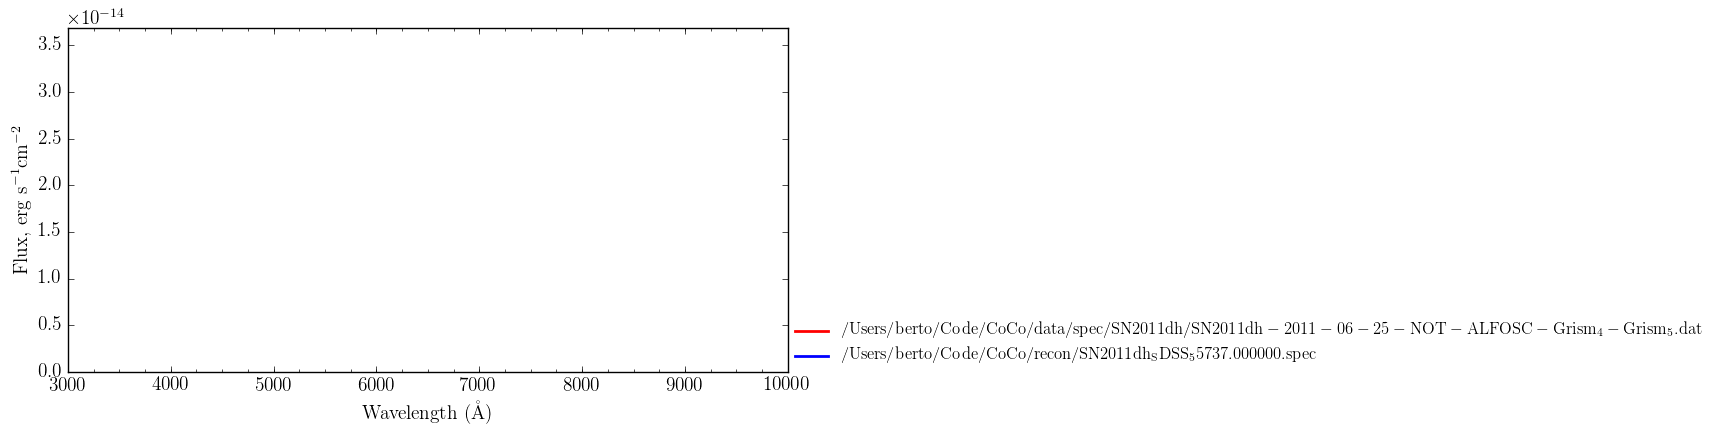

In [15]:
reload(pcc)
pcc.compare_spec(S, mS)

In [14]:
mS.data

wavelength,flux,flux_err
Angstrom,erg / (cm2 s),erg / (cm2 s)
float64,float64,float64
3502.18,2.34462e-14,1.22046e-16
3505.17,2.34817e-14,1.12807e-16
3508.17,2.22045e-14,9.78914e-17
3511.16,2.46072e-14,9.89412e-17
3514.16,2.58731e-14,9.42545e-17
3517.15,2.48452e-14,8.14523e-17
3520.15,2.50734e-14,7.35144e-17
3523.15,2.47174e-14,6.45332e-17
